In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

In [24]:
# i0 = 1.2 * (10**-3)
i0 = 2.55
alpha = 2
F = 96485
R = 8.314
T = 298


#Ciref = 10**-3
CO = 0.26 #mol/m3
CR = (10**-4)

# Eeq = 0.203 - ((R*T)/(n*F))*np.log(CR/CO)
Eeq = 0.203 
# Ect = np.array([-1.1,-0.9,-0.7,-0.5,-0.3,-0.1,0.1,0.3,0.5,0.7,0.9,1.1])
Ect = -1.1
OV = -0.075
# OV = Ect-Eeq

#step = 10 #2 minutes
#time_step = np.arange(0,60.001*60,step)
step = 10
Ntsteps = 14400
time_step = np.linspace(0, 4*60*60, Ntsteps)

concO2 = np.array([0.26])
BC1 = concO2[0] #Boundary condition 1, in the bulk
concOH = np.array([10**-4])

current = np.array([0])
O2_limit = 10**-20
print (len(time_step))
time_step[3500]

14400


3500.2430724355863

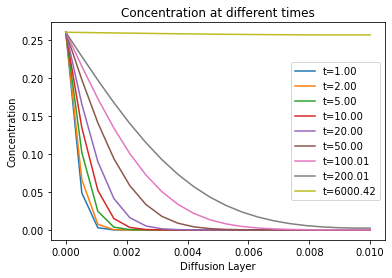

In [25]:
time = 360
BC1 = CO #Boundary condition 1, in the bulk
BC2 = 0 #Boundary condition 2, at the surface

#   Diffusion
N = 20  # number of points to discretize
L = 0.01
X = np.linspace(0, L, N)  # position along the rod
h = L / (N - 1)  # discretization spacing

#C0t = 0.26  # concentration at x = 0
D = 2.9*10**-9  # Diffusivity.  (Try increasing this to 0.028 or higher....)

dt = 10
# t = np.linspace(0, 60*60, 360)
#print(t)
alpha = D * dt / (h**2)
#print(alpha)

C_xt = []  # container for all the time steps
# initial condition at t = 0
C = np.zeros(X.shape)
C[0] = BC1

C_xt += [C]

current = np.array([])

for j in range(14400):
    N = np.zeros(C.shape)
    N[0] = BC1
    N[1:-1] = alpha * C[2:] + (1 - 2 * alpha) * C[1:-1] + alpha * C[0:-2] #+ (R*Ntsteps)
    if N[-2] < 0.25:
#         print('Yes Lawrence')
        N[-1] = N[-2]  # derivative boundary condition flux = 0
        current = np.append(current, 0)
        concOH = np.append(concOH, concOH[0])
    else:
#         print('Yes Sana')
        iloc = i0*((concOH[j]*np.exp((alpha*F*OV)/(R*T))) - (N[-2]*np.exp((-(alpha)*F*OV)/(R*T)))) #Current density
        RO2 = -1*abs(iloc)/(F*4) #Rate of O2 consumption or flux at the surface 
        N[-1] = (RO2*h) + N[-2] #Nerst equation to calculate new concentration 
#         print(RO2)
        ROH = 4*abs(iloc)/(F*4) #Rate of OH production
        new_concOH = (ROH*h) + concOH[j]
        concOH = np.append(concOH, new_concOH)
        
        newCurrent = iloc*0.0104
        current = np.append(current, newCurrent)
        
    C[:] = N #Crucial
#         C_xt += [N]
    if j in [1, 2, 5, 10, 20, 50, 100, 200, 6000]:
        C_xt += [N]
        plt.plot(X, N, label="t={0:1.2f}".format(time_step [j]))
        
plt.xlabel("Diffusion Layer")
plt.ylabel("Concentration")
# plt.ylim(0,0.05)
plt.title("Concentration at different times")
plt.legend(loc="best")
plt.show()

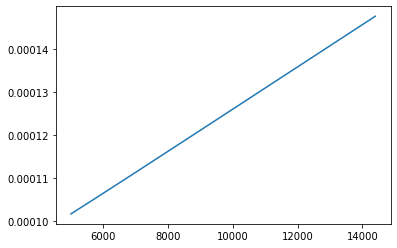

In [30]:
plt.plot(time_step[5000:14401], concOH[5000:14400])

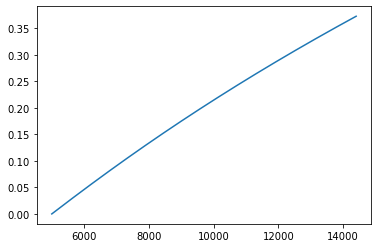

In [33]:
pH = 14 + np.log(concOH[5000:14400])
pH = pH-pH[0]
plt.plot(time_step[5000:14401], pH)

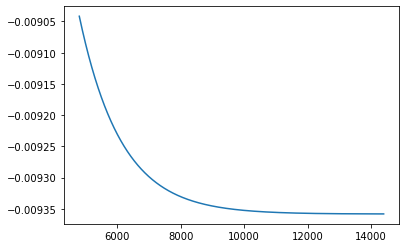

In [28]:
plt.plot(time_step[4800:14400], current[4800:14400])

In [19]:
for i in range(len([0,1,2,4])):
    print(i)

0
1
2
3


[0.26      0.0272194 0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.       ]
[0.26      0.0487396 0.0028496 0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.       ]
[2.60000000e-01 9.19723593e-02 1.85922782e-02 2.13457753e-03
 1.30000884e-04 3.26963555e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[2.60000000e-01 1.29643021e-01 4.70197038e-02 1.23782608e-02
 2.37474676e-03 3.31907141e-04 3.34568063e-05 2.37128884e-06
 1.12230654e-07 3.18742305e-09 4.11173717e-11 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[2.60000

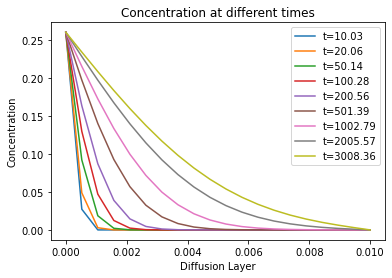

In [65]:
for i,t in enumerate(time_step):
#     print(i)
    if i == len(time_step) - 1:
        break
#     print(i)
    # Make this a function
    iloc = i0*((concOH[i]*np.exp((alpha*F*OV)/(R*T))) - (concO2[i]*np.exp((-(alpha)*F*OV)/(R*T)))) #Current density
    RO2 = -1*abs(iloc)/(F*4) #Rate of O2 consumption or flux at the surface 

    ROH = 4*abs(iloc)/(F*4) #Rate of OH production
    newCurrent = iloc*0.0104
    current = np.append(current, newCurrent)
    
    #Concentration of oxygen
#     Do not calculate the new conc
    new_concO2 = (RO2*step) + concO2[i] #Nerst equation to calculate new concentration 
    
    BC2 = new_concO2 #Boundary condition 2, at the surface,
    BC1 = 0.26 #Boundary condition 1, in the bulk
    
#   Diffusion
    N = 20  # number of points to discretize
    L = 0.01
    X = np.linspace(0, L, N)  # position along the rod
    h = L / (N - 1)  # discretization spacing

    #C0t = 0.26  # concentration at x = 0
    D = 2.9*10**-9  # Diffusivity.  (Try increasing this to 0.028 or higher....)

#     tfinal = 3600
#     Ntsteps = 360
    #dt = tfinal / (Ntsteps-1)
#     dt = tfinal / (Ntsteps)
#     t = np.linspace(0, tfinal, Ntsteps)
    dt = 10
    t = np.linspace(0, 60*60, 360)
    #print(t)
    alpha = D * dt / (h**2)
    #print(alpha)

    C_xt = []  # container for all the time steps
    # initial condition at t = 0
    C = np.zeros(X.shape)
    C[0] = BC1

    C_xt += [C]

    for j in range(1, 360):
        N = np.zeros(C.shape)
        N[0] = BC1
        N[1:-1] = alpha * C[2:] + (1 - 2 * alpha) * C[1:-1] + alpha * C[0:-2] #+ (R*Ntsteps)
#         N[-1] = BC2  # derivative boundary condition flux = 0
        C[:] = N
#         C_xt += [N]
        if j in [1, 2, 5, 10, 20, 50, 100, 200, 300]:
            C_xt += [N]
            print(N)
            plt.plot(X, N, label="t={0:1.2f}".format(t[j]))
    # print(N)
    
    
    if new_concO2 <= O2_limit:
        concO2 = np.append(concO2, min(concO2))
        
        #Calculate the New conc of OH based on O2_limit
        concOH = np.append(concOH, max(concOH))
    else:
        concO2 = np.append(concO2, new_concO2)
        #Concentration of hydroxide
        new_concOH = (ROH*step) + concOH[i]
        concOH = np.append(concOH, new_concOH)
        
plt.xlabel("Diffusion Layer")
plt.ylabel("Concentration")
plt.title("Concentration at different times")
plt.legend(loc="best")
plt.show()     
# if j in [1, 2, 5, 10, 20, 50, 100, 200, 300]:
#             plt.plot(X, N, label="t={0:1.2f}".format(t[j]))
# concO2

0


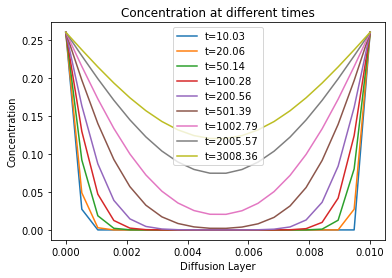

0.10498161559888579
[0.26       0.23617615 0.21266743 0.18977682 0.16778388 0.14693499
 0.1274359  0.10944684 0.09308054 0.07840309 0.06543739 0.05416891
 0.04455316 0.03652423 0.03000391 0.02491068 0.02116806 0.01871186
 0.01749597 0.01749628]


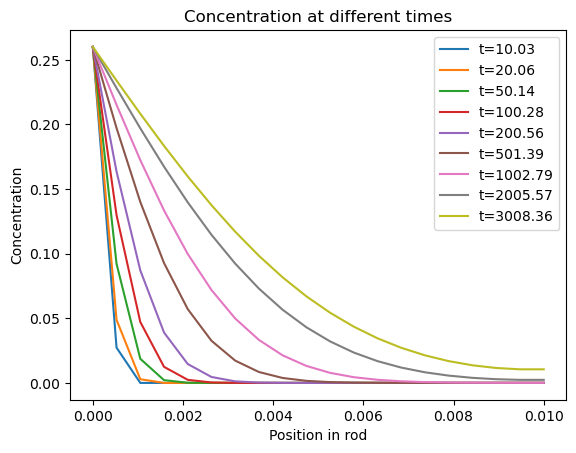

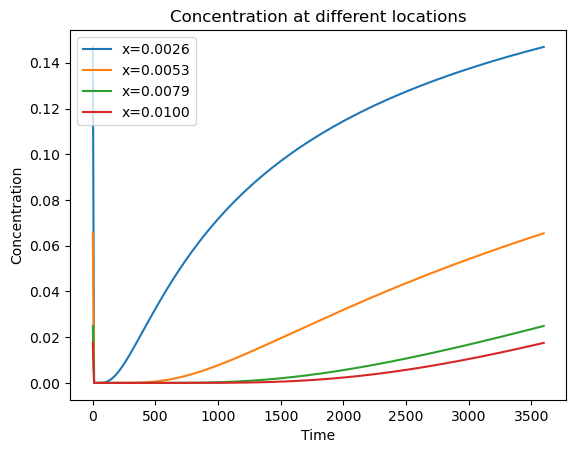

In [13]:
N = 20  # number of points to discretize
L = 0.01
X = np.linspace(0, L, N)  # position along the rod
h = L / (N - 1)  # discretization spacing

C0t = 0.26  # concentration at x = 0, BC1
D = 2.9*10**-9  # Diffusivity.  (Try increasing this to 0.028 or higher....)

tfinal = 3600
Ntsteps = 360
dt = tfinal / (Ntsteps-1)
t = np.linspace(0, tfinal, Ntsteps)
#print(t)
alpha = D * dt / h**2
print(alpha)

C_xt = []  # container for all the time steps
R=0.0005914625586516863
# initial condition at t = 0, IC
C = np.zeros(X.shape)
C[0] = C0t

C_xt += [C]

for j in range(1, Ntsteps):
    N = np.zeros(C.shape)
    N[0] = C0t
    N[1:-1] = alpha * C[2:] + (1 - 2 * alpha) * C[1:-1] + alpha * C[0:-2] #+ (R*Ntsteps)
    N[-1] = N[-2]+ (R*h) # derivative boundary condition flux = 0, BC2
    C[:] = N
    C_xt += [N]

    # plot selective solutions
    # sns.set_palette(sns.color_palette("coolwarm",10))
    if j in [1, 2, 5, 10, 20, 50, 100, 200, 300]:
        plt.plot(X, N, label="t={0:1.2f}".format(t[j]))
print(N)
plt.xlabel("Position in rod")
plt.ylabel("Concentration")
plt.title("Concentration at different times")
plt.legend(loc="best")
plt.show()


C_xt = np.array(C_xt)
plt.figure()
# sns.set_palette(sns.color_palette("coolwarm",4))
plt.plot(t, C_xt[:, 5], label="x={0:1.4f}".format(X[5]))
plt.plot(t, C_xt[:, 10], label="x={0:1.4f}".format(X[10]))
plt.plot(t, C_xt[:, 15], label="x={0:1.4f}".format(X[15]))
plt.plot(t, C_xt[:, 19], label="x={0:1.4f}".format(X[19]))
plt.legend(loc="best")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title("Concentration at different locations")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (359,) and (637,)

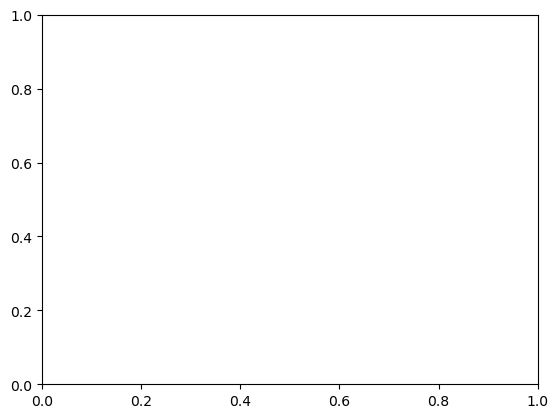

In [7]:
plt.plot(time_step[1:],current[1:])

ValueError: x and y must have same first dimension, but have shapes (360,) and (637,)

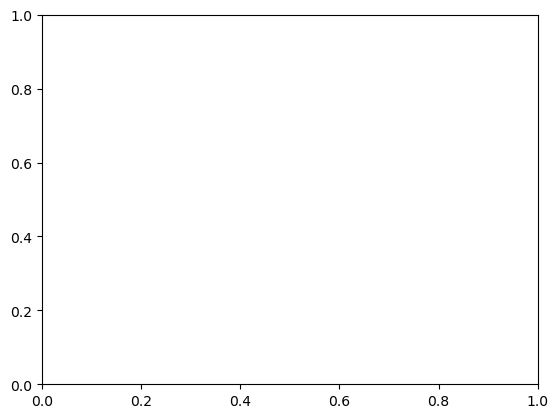

In [8]:
plt.plot(time_step,concO2,time_step,concOH)

In [6]:
DO2= 2.9e-9 #m2/s
step_x = 10 #2 minutes
x_step = np.arange(0,60.001*60,step_x)
for i,t in enumerate(time_step):
    for j,x in enumerate(x_step):
        cO2[i,j]= R(x_step)**2/DO2 + cO2[i,j-1]
        
        
    

TypeError: 'float' object is not callable

0.10498161559888579
[0.26       0.23617613 0.21266739 0.18977676 0.16778378 0.14693485
 0.12743572 0.10944661 0.09308025 0.07840272 0.06543692 0.05416833
 0.04455245 0.03652337 0.03000287 0.02490944 0.02116659 0.01871014
 0.01749396 0.01749396]


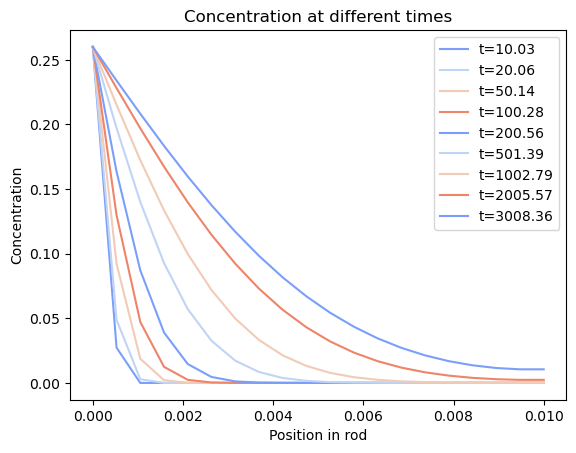

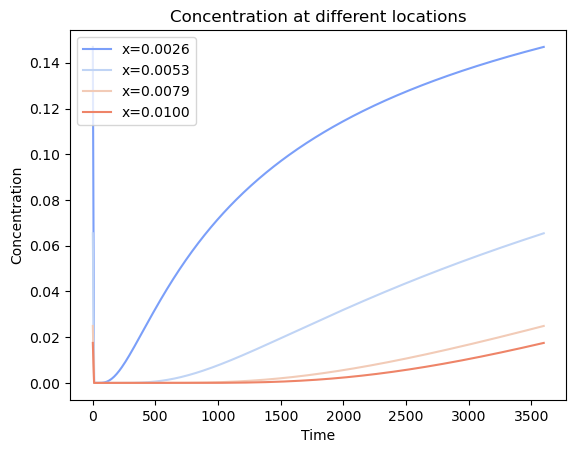

In [31]:
N = 20  # number of points to discretize
L = 0.01
X = np.linspace(0, L, N)  # position along the rod
h = L / (N - 1)  # discretization spacing

C0t = 0.26  # concentration at x = 0
D = 2.9*10**-9  # Diffusivity.  (Try increasing this to 0.028 or higher....)

tfinal = 3600
Ntsteps = 360
dt = tfinal / (Ntsteps-1)
t = np.linspace(0, tfinal, Ntsteps)
#print(t)
alpha = D * dt / h**2
print(alpha)

C_xt = []  # container for all the time steps
R=0.0005914625586516863
# initial condition at t = 0
C = np.zeros(X.shape)
C[0] = C0t

C_xt += [C]

for j in range(1, Ntsteps):
    N = np.zeros(C.shape)
    N[0] = C0t
    N[1:-1] = alpha * C[2:] + (1 - 2 * alpha) * C[1:-1] + alpha * C[0:-2] #+ (R*Ntsteps)
    N[-1] = N[-2]  # derivative boundary condition flux = 0
    C[:] = N
    C_xt += [N]

    # plot selective solutions
    # sns.set_palette(sns.color_palette("coolwarm",10))
    if j in [1, 2, 5, 10, 20, 50, 100, 200, 300]:
        plt.plot(X, N, label="t={0:1.2f}".format(t[j]))
# print(N)
plt.xlabel("Position in rod")
plt.ylabel("Concentration")
plt.title("Concentration at different times")
plt.legend(loc="best")
plt.show()


C_xt = np.array(C_xt)
plt.figure()
# sns.set_palette(sns.color_palette("coolwarm",4))
plt.plot(t, C_xt[:, 5], label="x={0:1.4f}".format(X[5]))
plt.plot(t, C_xt[:, 10], label="x={0:1.4f}".format(X[10]))
plt.plot(t, C_xt[:, 15], label="x={0:1.4f}".format(X[15]))
plt.plot(t, C_xt[:, 19], label="x={0:1.4f}".format(X[19]))
plt.legend(loc="best")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title("Concentration at different locations")
plt.show()